In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:blue")
    
    if draw_path:
        path_cover,_=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Bulk Testing with (0,1)-weights

In [3]:
failure_count = 0
bad_trees = []
for i in range(1000):
    n = 100
    T = nx.random_labeled_tree(n)
    
    for s,t in T.edges():
        T[s][t]['weight'] = random.random()

    path, diff = util.path_cover(T)
    if not math.isclose(diff, 0.0, rel_tol=1e-4):
        failure_count += 1
        bad_trees.append(T)

0: (38.64231151807695, 0, 93, 16)
16: (0, 0.8162593552917271, None, None)
72: (0.21493800246719696, 0.11855365525402295, 80, None)
93: (1.6055948562886884, 0.8731154363976825, 39, None)
37: (35.13240386763166, 0.08157584857484446, 5, 77)
80: (0, 0.21493800246719696, None, None)
39: (1.5929966504623616, 0.012598205826326758, 1, None)
5: (0.138281754583774, 0.7656304737952414, 4, None)
77: (33.95701647903305, 0.2714751602195954, 71, 60)
1: (1.5929966504623616, -0.7003219366169061, 23, 45)
4: (0, 0.138281754583774, None, None)
71: (0, 0.9480022129227129, None, None)
60: (32.94670571150592, 0.062308554604419863, 94, 66)
23: (0, 0.8684233036596588, None, None)
45: (0, 0.7245733468027027, None, None)
66: (0, 0.8249115544903922, None, None)
94: (0, 0.9408775618922998, None, None)
12: (31.180916595123232, -0.0314217965313881, 10, 61)
61: (0, 0.36126029370057167, None, None)
10: (30.445604004607617, 0.3740522968150445, 97, 70)
70: (0, 0.3782216403856188, None, None)
97: (6.895020223100634, 0.87

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



failures: 947


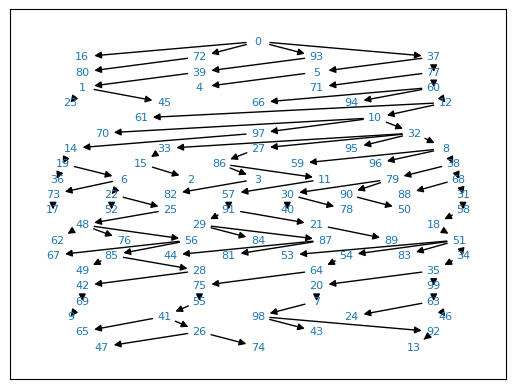

In [4]:
print(f'failures: {failure_count}')
bad_tree = bad_trees[0]
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0), draw_path=False)

0: (38.64231151807695, 0, 93, 16)
16: (0, 0.8162593552917271, None, None)
72: (0.21493800246719696, 0.11855365525402295, 80, None)
93: (1.6055948562886884, 0.8731154363976825, 39, None)
37: (35.13240386763166, 0.08157584857484446, 5, 77)
80: (0, 0.21493800246719696, None, None)
39: (1.5929966504623616, 0.012598205826326758, 1, None)
5: (0.138281754583774, 0.7656304737952414, 4, None)
77: (33.95701647903305, 0.2714751602195954, 71, 60)
1: (1.5929966504623616, -0.7003219366169061, 23, 45)
4: (0, 0.138281754583774, None, None)
71: (0, 0.9480022129227129, None, None)
60: (32.94670571150592, 0.062308554604419863, 94, 66)
23: (0, 0.8684233036596588, None, None)
45: (0, 0.7245733468027027, None, None)
66: (0, 0.8249115544903922, None, None)
94: (0, 0.9408775618922998, None, None)
12: (31.180916595123232, -0.0314217965313881, 10, 61)
61: (0, 0.36126029370057167, None, None)
10: (30.445604004607617, 0.3740522968150445, 97, 70)
70: (0, 0.3782216403856188, None, None)
97: (6.895020223100634, 0.87

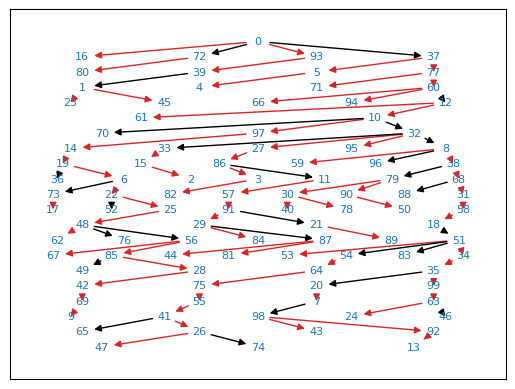

In [5]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [6]:
util.path_cover(bad_tree)

0: (38.64231151807695, 0, 93, 16)
16: (0, 0.8162593552917271, None, None)
72: (0.21493800246719696, 0.11855365525402295, 80, None)
93: (1.6055948562886884, 0.8731154363976825, 39, None)
37: (35.13240386763166, 0.08157584857484446, 5, 77)
80: (0, 0.21493800246719696, None, None)
39: (1.5929966504623616, 0.012598205826326758, 1, None)
5: (0.138281754583774, 0.7656304737952414, 4, None)
77: (33.95701647903305, 0.2714751602195954, 71, 60)
1: (1.5929966504623616, -0.7003219366169061, 23, 45)
4: (0, 0.138281754583774, None, None)
71: (0, 0.9480022129227129, None, None)
60: (32.94670571150592, 0.062308554604419863, 94, 66)
23: (0, 0.8684233036596588, None, None)
45: (0, 0.7245733468027027, None, None)
66: (0, 0.8249115544903922, None, None)
94: (0, 0.9408775618922998, None, None)
12: (31.180916595123232, -0.0314217965313881, 10, 61)
61: (0, 0.36126029370057167, None, None)
10: (30.445604004607617, 0.3740522968150445, 97, 70)
70: (0, 0.3782216403856188, None, None)
97: (6.895020223100634, 0.87

([(0, 93),
  (0, 16),
  (72, 80),
  (93, 39),
  (37, 5),
  (37, 77),
  (5, 4),
  (77, 71),
  (77, 60),
  (1, 23),
  (1, 45),
  (60, 94),
  (60, 66),
  (12, 10),
  (12, 61),
  (10, 97),
  (97, 14),
  (32, 27),
  (32, 95),
  (14, 19),
  (33, 15),
  (27, 86),
  (8, 38),
  (8, 59),
  (19, 6),
  (15, 2),
  (86, 3),
  (38, 68),
  (6, 22),
  (3, 82),
  (11, 57),
  (79, 90),
  (79, 30),
  (68, 31),
  (73, 17),
  (22, 25),
  (57, 91),
  (30, 78),
  (30, 40),
  (90, 50),
  (31, 58),
  (25, 48),
  (91, 29),
  (58, 18),
  (48, 62),
  (29, 84),
  (21, 89),
  (56, 85),
  (56, 67),
  (87, 81),
  (87, 44),
  (51, 53),
  (51, 34),
  (85, 28),
  (54, 64),
  (34, 35),
  (28, 42),
  (64, 75),
  (35, 99),
  (42, 69),
  (75, 55),
  (20, 7),
  (99, 63),
  (69, 9),
  (55, 41),
  (63, 24),
  (41, 26),
  (98, 92),
  (98, 43),
  (26, 47),
  (92, 13)],
 1.2049010211393067)

In [7]:
math.isclose(util.path_cover(bad_tree)[1],0.0,rel_tol=1e-4)

0: (38.64231151807695, 0, 93, 16)
16: (0, 0.8162593552917271, None, None)
72: (0.21493800246719696, 0.11855365525402295, 80, None)
93: (1.6055948562886884, 0.8731154363976825, 39, None)
37: (35.13240386763166, 0.08157584857484446, 5, 77)
80: (0, 0.21493800246719696, None, None)
39: (1.5929966504623616, 0.012598205826326758, 1, None)
5: (0.138281754583774, 0.7656304737952414, 4, None)
77: (33.95701647903305, 0.2714751602195954, 71, 60)
1: (1.5929966504623616, -0.7003219366169061, 23, 45)
4: (0, 0.138281754583774, None, None)
71: (0, 0.9480022129227129, None, None)
60: (32.94670571150592, 0.062308554604419863, 94, 66)
23: (0, 0.8684233036596588, None, None)
45: (0, 0.7245733468027027, None, None)
66: (0, 0.8249115544903922, None, None)
94: (0, 0.9408775618922998, None, None)
12: (31.180916595123232, -0.0314217965313881, 10, 61)
61: (0, 0.36126029370057167, None, None)
10: (30.445604004607617, 0.3740522968150445, 97, 70)
70: (0, 0.3782216403856188, None, None)
97: (6.895020223100634, 0.87

False

### Test Tree 2

In [8]:
test_tree2 = nx.read_graphml('test2.graphml', node_type=int)

0: (10.822361765183217, 0, 15, 9)
9: (0.3004731180411211, 0.6713299642248209, 8, None)
15: (0.9042411991169952, 0.6780263397318991, 16, None)
25: (8.268291144068382, 0.04553642651123535, 29, 12)
8: (0, 0.3004731180411211, None, None)
16: (0, 0.9042411991169952, None, None)
12: (0.7196005787645214, 0.004538339466855668, 18, 19)
13: (6.7017144722527675, -0.20575957010074597, 4, 7)
29: (0.8007522302265757, 0.0416855233576604, 28, None)
18: (0, 0.42572743115541245, None, None)
19: (0, 0.293873147609109, None, None)
4: (0, 0.9323397992625789, None, None)
7: (5.253157820130417, 0.516216852859772, 26, None)
28: (0, 0.8007522302265757, None, None)
26: (5.1058896770843685, 0.14726814304604874, 27, None)
27: (5.1058896770843685, -0.2998170097333873, 20, 17)
11: (3.4991384734068984, 0.1944862303788728, 14, None)
17: (0.3240866586413914, 0.40248832858559935, 3, 10)
20: (0, 0.8801762164504786, None, None)
14: (2.9217550524496616, 0.5773834209572368, 22, None)
3: (0, 0.274021136671734, None, None)
1

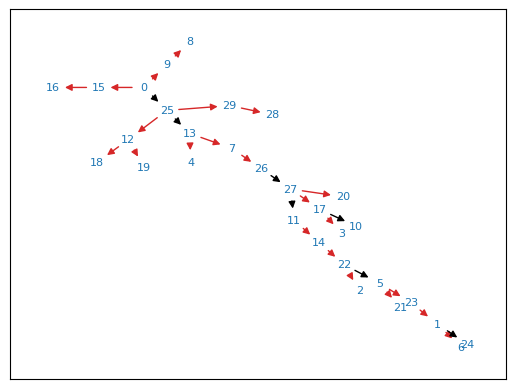

In [9]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

In [23]:
nx.get_edge_attributes(test_tree2, 'weight')

{(0, 9): 0.6713299642248209,
 (0, 15): 0.6780263397318991,
 (0, 25): 0.05007476597809102,
 (1, 6): 0.651040256900006,
 (1, 24): 0.2026817067165918,
 (1, 23): 0.2203683735684262,
 (2, 22): 0.7950465128663298,
 (3, 17): 0.274021136671734,
 (4, 13): 0.9323397992625789,
 (5, 21): 0.447258638081242,
 (5, 23): 0.05823788413584208,
 (5, 22): 0.5981424834526826,
 (7, 26): 0.14726814304604874,
 (7, 13): 0.516216852859772,
 (8, 9): 0.3004731180411211,
 (10, 17): 0.05006552196965741,
 (11, 14): 0.5773834209572368,
 (11, 27): 0.1944862303788728,
 (12, 18): 0.42572743115541245,
 (12, 19): 0.293873147609109,
 (12, 25): 0.29841148707596465,
 (13, 25): 0.31045728275902607,
 (14, 22): 0.7498033868978159,
 (15, 16): 0.9042411991169952,
 (17, 27): 0.45255385055525676,
 (20, 27): 0.8801762164504786,
 (25, 29): 0.0416855233576604,
 (26, 27): 0.10267131885221203,
 (28, 29): 0.8007522302265757}

### Test Tree 1 [(0,1)-weights]

In [10]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

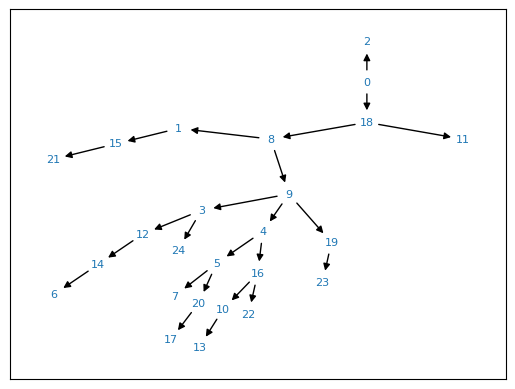

In [11]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

0: (11.12174046994793, 0, 18, 2)
2: (0, 0.7977562074230161, None, None)
18: (9.431516803694882, 0.892467458830033, 8, 11)
8: (9.2136087981177, 0.12603851472739536, 1, 9)
11: (0, 0.09186949084978413, None, None)
1: (1.7432810981749651, 0.8381008122574674, 15, None)
9: (6.632226887685268, -0.22552858561678446, 19, 3)
15: (0.8864538053441008, 0.8568272928308645, 21, None)
3: (2.033408282585799, 0.4908051027631126, 24, 12)
4: (3.0535582336576352, 0.11258568403417335, 5, 16)
19: (0.2067345124482346, 0.8477207562304858, 23, None)
21: (0, 0.8864538053441008, None, None)
12: (1.3272090876829628, 0.3243095919924279, 14, None)
24: (0, 0.3818896029104081, None, None)
5: (0.6438187145933159, 0.5839485221388294, 7, 20)
16: (1.6085078673466766, 0.21728312957881357, 22, 10)
23: (0, 0.2067345124482346, None, None)
14: (0.9769508317917671, 0.35025825589119564, 6, None)
7: (0, 0.5737376856525619, None, None)
20: (0.044350567376415406, 0.025730461564338558, 17, None)
10: (0.6643525896073521, 0.4600428895

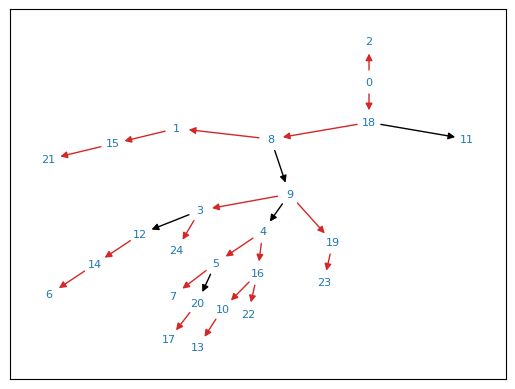

In [12]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [13]:
nx.get_edge_attributes(test_tree, 'weight')

{(0, 2): 0.7977562074230161,
 (0, 18): 0.9843369496798171,
 (1, 15): 0.8568272928308645,
 (1, 8): 0.8381008122574674,
 (3, 12): 0.3243095919924279,
 (3, 9): 0.8151146947555405,
 (3, 24): 0.3818896029104081,
 (4, 5): 0.609678983703168,
 (4, 16): 0.6773260190983791,
 (4, 9): 0.3298688136129869,
 (5, 7): 0.5737376856525619,
 (5, 20): 0.025730461564338558,
 (6, 14): 0.9769508317917671,
 (8, 18): 0.12603851472739536,
 (8, 9): 0.26527651714632816,
 (9, 19): 0.8477207562304858,
 (10, 13): 0.6643525896073521,
 (10, 16): 0.4600428895195655,
 (11, 18): 0.09186949084978413,
 (12, 14): 0.35025825589119564,
 (15, 21): 0.8864538053441008,
 (16, 22): 0.48411238821975877,
 (17, 20): 0.044350567376415406,
 (19, 23): 0.2067345124482346}

### Random tree with edge weights in [0,1)

In [14]:
n = 30
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

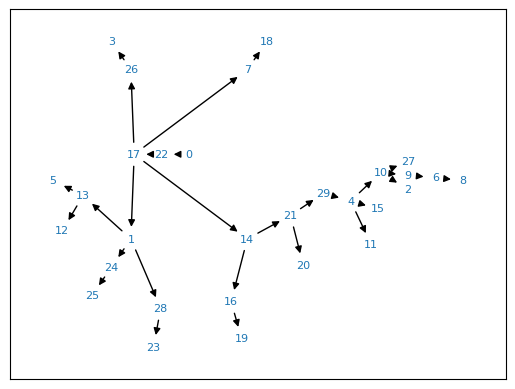

In [15]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

0: (11.796035883279758, 0, 22, None)
22: (11.348807475415144, 0.44722840786461404, 17, None)
17: (10.883394640789946, 0.4654128346251988, 26, 1)
7: (0.08924446182641721, 0.3400151733859479, 18, None)
26: (0.16801307378720143, 0.43754338171257157, 3, None)
1: (3.4329973087097327, 0.3541249511818606, 28, 13)
14: (6.401471463572161, 0.24009345544371008, 16, 21)
18: (0, 0.08924446182641721, None, None)
3: (0, 0.16801307378720143, None, None)
13: (1.2726003767043301, 0.5971217905670958, 12, 5)
24: (0.16790838902407168, 0.5195038692325643, 25, None)
28: (0.7071539553338297, 0.6882127970804055, 23, None)
16: (0.3590152836915179, 0.7092826804799994, 19, None)
21: (4.8484064309206945, 0.4847670684799493, 29, 20)
5: (0, 0.40028458473951956, None, None)
12: (0, 0.8723157919648106, None, None)
25: (0, 0.16790838902407168, None, None)
23: (0, 0.7071539553338297, None, None)
19: (0, 0.3590152836915179, None, None)
20: (0, 0.09144319460403671, None, None)
29: (3.8834240761567926, 0.8735391601598652, 

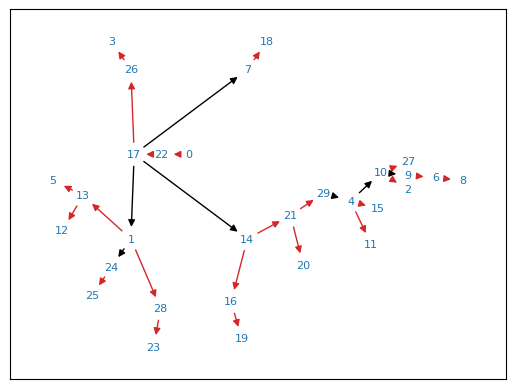

In [16]:
draw_tree(tree, layout)

In [17]:
nx.get_edge_attributes(tree, 'weight')

{(0, 22): 0.44722840786461404,
 (1, 13): 0.9974063753066154,
 (1, 24): 0.5195038692325643,
 (1, 28): 0.6882127970804055,
 (1, 17): 0.9512467417489564,
 (2, 10): 0.9986961122759889,
 (3, 26): 0.16801307378720143,
 (4, 11): 0.8694771038183893,
 (4, 15): 0.367682665364337,
 (4, 10): 0.8035132355715913,
 (4, 29): 0.3654504338086755,
 (5, 13): 0.40028458473951956,
 (6, 8): 0.3086088886136572,
 (6, 9): 0.5736273855312943,
 (7, 18): 0.08924446182641721,
 (7, 17): 0.3400151733859479,
 (9, 10): 0.6066579977760799,
 (10, 27): 0.7653319205531262,
 (12, 13): 0.8723157919648106,
 (14, 16): 0.7092826804799994,
 (14, 17): 0.7248605239236594,
 (14, 21): 0.576210263083986,
 (16, 19): 0.3590152836915179,
 (17, 22): 0.8195377858070594,
 (17, 26): 0.43754338171257157,
 (20, 21): 0.09144319460403671,
 (21, 29): 0.8735391601598652,
 (23, 28): 0.7071539553338297,
 (24, 25): 0.16790838902407168}

### Unit edge weights

In [18]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

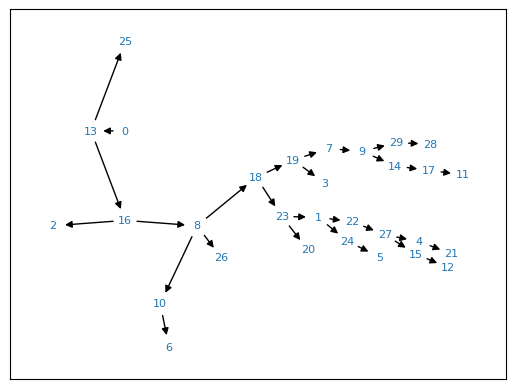

In [19]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

0: (22, 0, 13, None)
13: (22, 0, 16, 25)
25: (0, 1, None, None)
16: (20, 1, 2, 8)
2: (0, 1, None, None)
8: (19, 0, 26, 10)
10: (1, 1, 6, None)
26: (0, 1, None, None)
18: (16, 1, 23, 19)
6: (0, 1, None, None)
23: (8, 1, 20, 1)
19: (7, 0, 7, 3)
20: (0, 1, None, None)
1: (7, 0, 22, 24)
3: (0, 1, None, None)
7: (5, 1, 9, None)
24: (1, 1, 5, None)
22: (4, 1, 27, None)
9: (5, 0, 29, 14)
5: (0, 1, None, None)
27: (4, 0, 4, 15)
14: (2, 1, 17, None)
29: (1, 1, 28, None)
15: (1, 1, 12, None)
4: (1, 1, 21, None)
17: (1, 1, 11, None)
28: (0, 1, None, None)
12: (0, 1, None, None)
21: (0, 1, None, None)
11: (0, 1, None, None)
Path edges: [(13, 16), (13, 25), (16, 2), (8, 26), (8, 10), (10, 6), (18, 23), (18, 19), (23, 20), (19, 7), (19, 3), (1, 22), (1, 24), (24, 5), (9, 29), (9, 14), (27, 4), (27, 15), (14, 17), (29, 28), (15, 12), (4, 21), (17, 11)]
Total path length (x(root)): 22
Total path length (actual): 23
Difference: 1


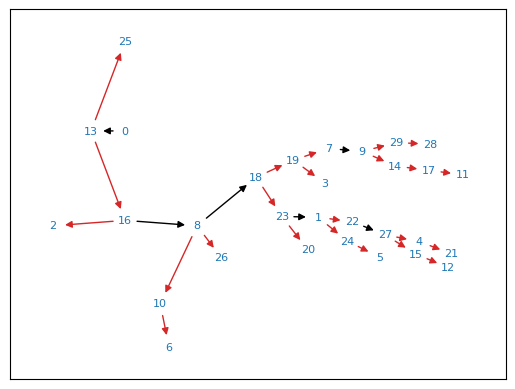

In [20]:
draw_tree(ones_tree, ones_layout)

In [21]:
util.path_cover_two(ones_tree)

{25: 0,
 2: 0,
 26: 0,
 6: 0,
 20: 0,
 3: 0,
 5: 0,
 28: 0,
 12: 0,
 21: 0,
 11: 0,
 17: 1,
 4: 1,
 15: 1,
 29: 1,
 14: 2,
 27: 4,
 9: 5,
 22: 4,
 24: 1,
 7: 5,
 1: 7,
 19: 7,
 23: 8,
 18: 16,
 10: 1,
 8: 19,
 16: 20,
 13: 22,
 0: 22}